In [2]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
corpus = [
    "The children are playing in the gardens.",
    "Their mothers were talking and watching them closely.",
    "He studies various subjects to improve his knowledge.",
    "The dogs barked loudly at the strangers passing by.",
    "Running and jogging are great exercises for health.",
    "ghjvkjfj ###!$ %$#$%^^ 2586666",
    "my phone number is 1234567890",
    "I am learning Python programming.",
    "The weather is nice today.",
    "She loves to read books and write stories.",
    "He is a talented musician.",
    "The sun is shining brightly .",
]

In [10]:
s = "My name is muskan  23556663 ."

In [12]:
s.lower()

'my name is muskan  23556663 .'

In [14]:
re.sub(r'\d+',"",s )

'My name is muskan   .'

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
s.translate(str.maketrans("","",string.punctuation))

'My name is muskan  23556663 '

In [17]:
word_tokenize(s)

['My', 'name', 'is', 'muskan', '23556663', '.']

In [19]:
s1 = ['My', 'name', 'is', 'muskan', '23556663', '.']

In [20]:
[i for i in s1 if i not in stopwords.words('english')]

['My', 'name', 'muskan', '23556663', '.']

In [21]:
def word_preprocessing(text):
    text = text.lower()
    text = re.sub(r'\d+', "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    word = word_tokenize(text)
    word  = [i for i in word if i not in stopwords.words('english')]
    return word

In [22]:
corpus

['The children are playing in the gardens.',
 'Their mothers were talking and watching them closely.',
 'He studies various subjects to improve his knowledge.',
 'The dogs barked loudly at the strangers passing by.',
 'Running and jogging are great exercises for health.',
 'ghjvkjfj ###!$ %$#$%^^ 2586666',
 'my phone number is 1234567890',
 'I am learning Python programming.',
 'The weather is nice today.',
 'She loves to read books and write stories.',
 'He is a talented musician.',
 'The sun is shining brightly .']

In [26]:
processed_corpus = [word_preprocessing(text) for text in corpus]

In [27]:
processed_corpus 

[['children', 'playing', 'gardens'],
 ['mothers', 'talking', 'watching', 'closely'],
 ['studies', 'various', 'subjects', 'improve', 'knowledge'],
 ['dogs', 'barked', 'loudly', 'strangers', 'passing'],
 ['running', 'jogging', 'great', 'exercises', 'health'],
 ['ghjvkjfj'],
 ['phone', 'number'],
 ['learning', 'python', 'programming'],
 ['weather', 'nice', 'today'],
 ['loves', 'read', 'books', 'write', 'stories'],
 ['talented', 'musician'],
 ['sun', 'shining', 'brightly']]

In [28]:
word2vec_cbow = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, sg=0)
word2vec_skipgram = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, sg=1)

In [29]:
word2vec_cbow

In [30]:
word2vec_skipgram

In [32]:
word2vec_skipgram.wv['playing']

array([ 0.00973555, -0.00978038, -0.00649949,  0.00278379,  0.00643199,
       -0.00536737,  0.00275249,  0.00912131, -0.00681542, -0.00609991,
       -0.00498964, -0.00367641,  0.00184972,  0.00968263,  0.00643778,
        0.00039709,  0.00247077,  0.00844049,  0.00912898,  0.00562875,
        0.00594626, -0.00762069, -0.00382767, -0.00568033,  0.00618177,
       -0.00225645, -0.00877944,  0.00761912,  0.00839968, -0.00332024,
        0.00911666, -0.00073836, -0.00362652, -0.00038469,  0.00019443,
       -0.0035049 ,  0.00281324,  0.00572971,  0.00686901, -0.00890347,
       -0.00219273, -0.0054818 ,  0.0075211 ,  0.0065017 , -0.00436072,
        0.00232683, -0.00595366,  0.0002365 ,  0.00946176, -0.00260984,
       -0.00518772, -0.00739721, -0.00291194, -0.00086431,  0.00352786,
        0.00974189, -0.00338928,  0.00190177,  0.00968101,  0.00153159,
        0.0009865 ,  0.00980237,  0.00929546,  0.00770807, -0.00617053,
        0.00998399,  0.00584899,  0.00907267, -0.0019952 ,  0.00

In [33]:
word2vec_skipgram.vector_size

100

In [34]:
len(word2vec_skipgram.wv['playing'])

100

In [35]:
word2vec_skipgram.wv.most_similar('playing')

[('great', 0.1592574417591095),
 ('nice', 0.15621212124824524),
 ('running', 0.1528114527463913),
 ('programming', 0.14474642276763916),
 ('closely', 0.14256368577480316),
 ('various', 0.13264012336730957),
 ('gardens', 0.11936754733324051),
 ('read', 0.0959688201546669),
 ('dogs', 0.07913301885128021),
 ('barked', 0.07480262964963913)]

In [36]:
word2vec_skipgram.wv.most_similar('playing',topn=3)

[('great', 0.1592574417591095),
 ('nice', 0.15621212124824524),
 ('running', 0.1528114527463913)]

In [37]:
word2vec_cbow.wv['nice']

array([ 6.4154547e-03, -8.9520868e-03, -7.3469346e-03, -1.7526997e-03,
        1.6995452e-03, -1.0320020e-03, -5.2062995e-03,  6.5794853e-03,
        8.7809842e-03, -7.4097263e-03,  9.8038130e-03,  7.3659159e-03,
       -7.4588014e-03, -1.8998036e-03,  4.2526713e-03,  7.0562297e-03,
       -3.6635681e-03, -6.9723977e-03,  4.7238315e-03, -9.0400865e-03,
       -5.8524357e-03, -1.2835151e-03,  5.4787775e-03, -5.6867185e-03,
        4.7861603e-03, -4.3538306e-04,  2.6688271e-03,  6.4063556e-03,
        1.4165842e-03,  7.7080587e-03, -3.2385555e-04, -8.2640499e-03,
        9.1765206e-03, -4.8575872e-03,  4.7202436e-03, -3.9039196e-03,
       -7.3300153e-03, -6.5141502e-03,  4.6765730e-03, -6.5936177e-04,
        1.4577655e-03, -8.9275399e-03, -5.1455111e-03, -6.0527441e-03,
        8.4136371e-03, -8.6976504e-03,  5.0236350e-03, -8.6134818e-04,
        1.8785532e-04,  8.7985899e-03, -3.5855167e-03, -6.9369832e-03,
        7.6262630e-04,  7.7418154e-03,  9.1189090e-03, -3.6875363e-03,
      

In [38]:
word2vec_cbow.wv.similarity("nice", "weather")

0.14902353

In [39]:
word2vec_cbow.wv.index_to_key

['brightly',
 'great',
 'running',
 'passing',
 'strangers',
 'loudly',
 'barked',
 'dogs',
 'knowledge',
 'improve',
 'subjects',
 'various',
 'studies',
 'closely',
 'watching',
 'talking',
 'mothers',
 'gardens',
 'playing',
 'jogging',
 'exercises',
 'shining',
 'health',
 'sun',
 'musician',
 'talented',
 'stories',
 'write',
 'books',
 'read',
 'loves',
 'today',
 'nice',
 'weather',
 'programming',
 'python',
 'learning',
 'number',
 'phone',
 'ghjvkjfj',
 'children']

In [40]:
word2vec_cbow.wv.most_similar('children', topn=5)

[('write', 0.259906530380249),
 ('python', 0.2598475217819214),
 ('sun', 0.22203128039836884),
 ('studies', 0.12152884900569916),
 ('great', 0.11792425811290741)]

In [41]:
word2vec_skipgram.wv.most_similar('children', topn=5)

[('python', 0.2598475217819214),
 ('write', 0.2598419487476349),
 ('sun', 0.22203128039836884),
 ('studies', 0.1216016411781311),
 ('great', 0.11782854050397873)]

In [42]:
corpus

['The children are playing in the gardens.',
 'Their mothers were talking and watching them closely.',
 'He studies various subjects to improve his knowledge.',
 'The dogs barked loudly at the strangers passing by.',
 'Running and jogging are great exercises for health.',
 'ghjvkjfj ###!$ %$#$%^^ 2586666',
 'my phone number is 1234567890',
 'I am learning Python programming.',
 'The weather is nice today.',
 'She loves to read books and write stories.',
 'He is a talented musician.',
 'The sun is shining brightly .']

In [44]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [47]:
word_vectors = word2vec_cbow.wv
vocab =list(word_vectors.index_to_key)

In [48]:
vocab

['brightly',
 'great',
 'running',
 'passing',
 'strangers',
 'loudly',
 'barked',
 'dogs',
 'knowledge',
 'improve',
 'subjects',
 'various',
 'studies',
 'closely',
 'watching',
 'talking',
 'mothers',
 'gardens',
 'playing',
 'jogging',
 'exercises',
 'shining',
 'health',
 'sun',
 'musician',
 'talented',
 'stories',
 'write',
 'books',
 'read',
 'loves',
 'today',
 'nice',
 'weather',
 'programming',
 'python',
 'learning',
 'number',
 'phone',
 'ghjvkjfj',
 'children']

In [49]:
len(vocab)

41

In [50]:
[word_vectors[i] for i in vocab]

[array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
        -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
        -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
        -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
         2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
         7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
         6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
        -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
         9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
         8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
        -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
        -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
         4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
        -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.46217

In [52]:
X = np.array([word_vectors[i] for i in vocab])

In [56]:
tsne = TSNE(n_components=2)

In [58]:
x_new_embedings = tsne.fit_transform(X)

In [59]:
x_new_embedings

array([[ 2.8123875, -2.6972659],
       [ 1.538006 , -3.8184001],
       [ 2.0963807, -2.632304 ],
       [ 1.2588784, -2.766875 ],
       [ 1.6689997, -3.4258583],
       [ 1.3842789, -2.2669935],
       [ 2.5088198, -2.9669356],
       [ 2.4210622, -3.22592  ],
       [ 1.9368821, -2.3284316],
       [ 2.9876409, -2.8669481],
       [ 2.8711488, -3.5241177],
       [ 1.9833875, -2.899688 ],
       [ 2.756122 , -3.5740347],
       [ 1.4733695, -3.7136557],
       [ 1.1799194, -3.11735  ],
       [ 1.774679 , -4.424549 ],
       [ 2.869917 , -2.3866272],
       [ 1.17977  , -3.169537 ],
       [ 2.2929132, -2.699951 ],
       [ 2.2734985, -3.0420995],
       [ 1.9296509, -2.7555563],
       [ 2.1080499, -3.679025 ],
       [ 1.9410572, -4.118638 ],
       [ 2.4421399, -4.1545634],
       [ 3.3012064, -3.6766162],
       [ 2.0387194, -3.637634 ],
       [ 2.1258724, -3.392969 ],
       [ 1.9949516, -2.3505821],
       [ 2.7812302, -2.5374918],
       [ 2.4865482, -3.872524 ],
       [ 1

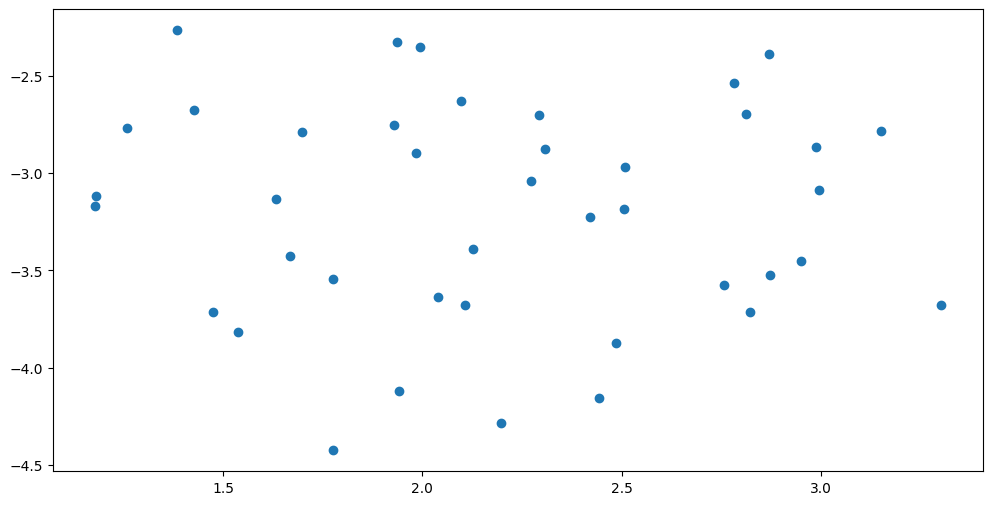

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1] , marker='o')

In [62]:
vocab

['brightly',
 'great',
 'running',
 'passing',
 'strangers',
 'loudly',
 'barked',
 'dogs',
 'knowledge',
 'improve',
 'subjects',
 'various',
 'studies',
 'closely',
 'watching',
 'talking',
 'mothers',
 'gardens',
 'playing',
 'jogging',
 'exercises',
 'shining',
 'health',
 'sun',
 'musician',
 'talented',
 'stories',
 'write',
 'books',
 'read',
 'loves',
 'today',
 'nice',
 'weather',
 'programming',
 'python',
 'learning',
 'number',
 'phone',
 'ghjvkjfj',
 'children']

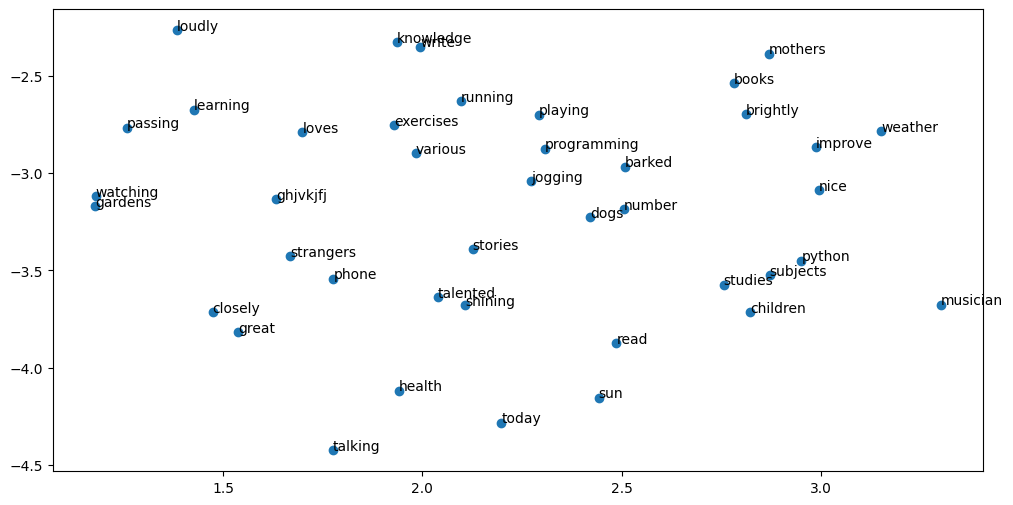

In [67]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedings[: , 0] , x_new_embedings[:,1] , marker='o')
for i, words in enumerate(vocab[:len(x_new_embedings)]):
    plt.annotate(words,xy=(x_new_embedings[i,0],x_new_embedings[i,1]))
plt.show()

In [68]:
print("The End")

The End
